# Linear Regression



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/Colab Notebooks/Databases')

In [ ]:
%matplotlib inline

#imports
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, mean_squared_error, mean_absolute_error

# Example 1: Simple prediction

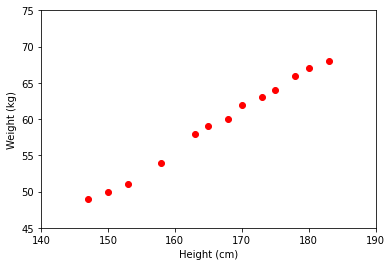

In [ ]:
# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# weight (kg)
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T
# Visualize data 
plt.plot(X, y, 'ro')
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [ ]:
# Building Xbar 
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

In [ ]:
Xbar

array([[  1., 147.],
       [  1., 150.],
       [  1., 153.],
       [  1., 158.],
       [  1., 163.],
       [  1., 165.],
       [  1., 168.],
       [  1., 170.],
       [  1., 173.],
       [  1., 175.],
       [  1., 178.],
       [  1., 180.],
       [  1., 183.]])

In [ ]:
from sklearn import datasets, linear_model

# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Xbar, y)

# Compare two results
print('Nghiệm tìm được bằng scikit-learn  : ', regr.coef_)

Nghiệm tìm được bằng scikit-learn  :  [[-33.73541021   0.55920496]]


In [ ]:
w_0 = regr.coef_[0][0]
w_1 = regr.coef_[0][1]

In [ ]:
y1 = w_1*155 + w_0
y2 = w_1*190 + w_0

print('Dự đoán cân nặng của người có chiều cao 155 cm: %.2f (kg), số liệu thật: 52 (kg)'  %(y1))
print('Dự đoán cân nặng của người có chiều cao 175 cm: %.2f (kg), số liệu thật: 56 (kg)'  %(y2))

Dự đoán cân nặng của người có chiều cao 155 cm: 52.94 (kg), số liệu thật: 52 (kg)
Dự đoán cân nặng của người có chiều cao 175 cm: 72.51 (kg), số liệu thật: 56 (kg)


### Example 2:
#### Import the data

Here, we're using a dataset with two columns containing the amount of hours studied and the test scores students achieved, respectively.


In [ ]:
import pandas as pd
path2data = '/content/drive/My Drive/OwnDrive/teach_python/DA class 2/data'

In [ ]:
points = pd.read_csv(path2data + '/study_hours_LR.csv', delimiter=',',header=None)
points.head()

FileNotFoundError: ignored

##### First view data distribution

In [ ]:
#Plot the dataset
plt.scatter(points.loc[:,0],points.loc[:,1])
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Dataset')
plt.show()

NameError: ignored

In [ ]:
X = points[[0]]
y = points[[1]]

# Splitting the dataset into the Training set and Test set
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

NameError: ignored

In [ ]:
X_train[:3]

,0
51,44.502538
27,63.615561
18,45.618644


,1
51,65.101712
27,95.229366
18,48.847153


##### Scale data

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [ ]:
X_train[:3]

array([[-0.47618183],
       [ 1.47376266],
       [-0.36231475]])

In [ ]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_test[:3]

array([[0.83045848],
       [0.19575211],
       [1.26102653]])

In [ ]:
regressor.coef_

array([[0.81678459]])

In [ ]:
# Predicting the Test set results
y_pred = .predregressorict(X_test)

In [ ]:
y_pred[:3]

array([[0.67830569],
       [0.15988731],
       [1.02998704]])

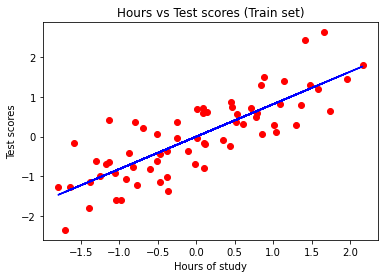

In [ ]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs Test scores (Train set)')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.show()

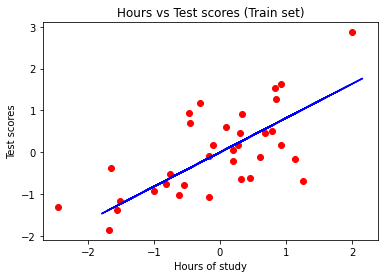

In [ ]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs Test scores (Train set)')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

#these will be logged to your sklearn-demos project on Comet.ml
params={"random_state":0,
        "model_type":"simple regression",
        "scaler":"none",
        "stratify":True
}

metrics = {"mse":mse,
           "mae":mae
}

metrics

{'mse': 0.5561253471134849, 'mae': 0.5917279791099239}

### Example 2:
Implementing Linear Regression for predicting profit of a food truck given the population and profits of different cities

In [ ]:
df = pd.read_csv(path2data + '/ex1data1.txt', header = None, names = ['Population', 'Profit'])
df.head()

NameError: ignored

<font color='red'>**Exercise 1**</font>: 
1.   Calculate **Median** and **std** of Population and Profit?
2.   Make a plot can show relationship between **Population** and **Profit**
3.   Filter outliers
4.   Implementing Linear Regression for predicting profit of a food truck given the population and profits of different cities **On new data**
5.   Visualize the test result



In [ ]:
df2 = pd.read_csv(path2data + '/ex1data2.txt', header = None)
df2.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


<font color='red'>**Exercise 2**</font>: 

In [ ]:
import pandas as pd
raw_data = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/BD-Analytics2022/data/AgesAndHeights.pkl')
print(raw_data.head())

         Age     Height
0  14.767874  59.627484
1   3.107671  36.146453
2   7.266917  46.912878
3   1.815180  29.125660
4  16.753758  68.170414


In [ ]:
raw_data.shape

(100, 2)

Ex 2.1:
*   Plot distribution of the two variables?
*   Plot a chart to show the relationship between Age and Hight?



Ex 2.2:
*   Check missing, abnormal?
*   Cleaning data and check again with Exercise 1?



Ex 2.3: 
*   Build a model to predict Hight of any person given Age?
*   How tall of Tom, he is 13 years ago?



# **Classification**

## **Mobile Price Prediction**
#### AIM
In this Project,On the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc we are predicting Price range of the mobile

* In this data:
    * id:ID
    * battery_power:Total energy a battery can store in one time measured in mAh
    * blue:Has bluetooth or not
    * clock_speed:speed at which microprocessor executes instructions
    * dual_sim:Has dual sim support or not
    * fc:Front Camera mega pixels
    * four_g:Has 4G or not
    * int_memory:Internal Memory in Gigabytes
    * m_dep:Mobile Depth in cm
    * mobile_wt:Weight of mobile phone
    * n_cores:Number of cores of processor
    * pc:Primary Camera mega pixels
    * px_height:Pixel Resolution Height
    * px_width:Pixel Resolution Width
    * ram:Random Access Memory in Megabytes
    * sc_h:Screen Height of mobile in cm
    * sc_w:Screen Width of mobile in cm
    * talk_time:longest time that a single battery charge will last when you are
    * three_g:Has 3G or not
    * touch_screen:Has touch screen or not
    * wifi:Has wifi or not

#### USE:

* This kind of prediction will help companies estimate price of mobiles to give tough competion to other mobile manufacturer
* Also it will be usefull for Consumers to verify that they are paying best price for a mobile.

#### **Analytics**
##### Load data

In [ ]:
import sys
sys.path.insert(0,'/content/drive/My Drive/OwnDrive/teach_python/DA class 2/data')

In [ ]:
import pandas as pd
path2data = '/content/drive/MyDrive/Colab Notebooks/Databases'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/mobile_price_pred_train.csv')
dataset.head()

FileNotFoundError: ignored

###### **Data Analysis**

In [ ]:
dataset.info()

In [ ]:
dataset.describe()

In [ ]:
dataset.isnull().sum()

###### Noise & missing data processing
- Filter missing & noise

In [ ]:
dataset.shape

In [ ]:
dataset = dataset.dropna()
dataset = dataset[dataset.battery_power <= dataset.battery_power.quantile(0.95)]
dataset = dataset[dataset.int_memory <= dataset.int_memory.quantile(0.95)]
dataset.shape

In [ ]:
dataset.describe()

In [ ]:
### How does ram is affected by price
sns.jointplot(x='ram',y='price_range',data=dataset,color='red',kind='kde')

In [ ]:
### Internal Memory vs Price Range
sns.boxplot(y="int_memory", x="price_range", data=dataset)

In [ ]:
### % of Phones which support 3G
labels = ["3G-supported",'Not supported']
values=dataset['three_g'].value_counts().values

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

In [ ]:
### % of Phones which support 4G
labels4g = ["4G-supported",'Not supported']
values4g = dataset['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

In [ ]:
### Battery power vs Price Range
sns.boxplot(x="price_range", y="battery_power", data=dataset)

In [ ]:
### No of Phones vs Camera megapixels of front and primary camera
plt.figure(figsize=(10,6))
dataset['fc'].hist(alpha=0.5,color='blue',label='Front camera')
dataset['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

In [ ]:
### Mobile Weght vs Price range
sns.jointplot(x='mobile_wt',y='price_range',data=dataset,kind='kde');

In [ ]:
### Talk time vs Price range
sns.pointplot(y="talk_time", x="price_range", data=dataset)

###### **Modeling**

In [ ]:
## X & Y array
X=dataset.drop('price_range',axis=1)
y=dataset['price_range']

In [ ]:
## Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [ ]:
## Creating & Training Linear Regression Model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(X_train,y_train)

lm.score(X_test,y_test)

In [ ]:
## Creating & Training KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

knn.score(X_test,y_test)

In [ ]:
### Elbow Method For optimum value of K
error_rate = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
## Creating & Training Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

logmodel.fit(X_train,y_train)

logmodel.score(X_test,y_test)

In [ ]:
## Creating & Training Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

dtree.fit(X_train,y_train)

dtree.score(X_test,y_test)

In [ ]:
## Creating & Training Random Tree Model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

rfc.score(X_test,y_test)

<font color='red'>**Conclusion: KNN**</font>

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
y_pred[:5]

In [ ]:
## RESULT: KNN
from sklearn.metrics import classification_report,confusion_matrix
pred = knn.predict(X_test)

print(classification_report(y_test,pred))

matrix=confusion_matrix(y_test,pred)
print(matrix)

plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)

In [ ]:
# Price prediction of mobile_price_pred_test.csv Using KNN for Prediction
data_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/mobile_price_pred_test.csv')

data_test.head()

In [ ]:
data_test=data_test.drop('id',axis=1)
data_test.head()

In [ ]:
# Model
predicted_price=knn.predict(data_test)

# Adding Predicted price to test
data_test['price_range']=predicted_price

data_test.head()

## Churn prediction
The dataset is the details of the customers in a company.
<font color='blue'>==> Target: Analyze & build a model can predict a customer is churned.</font>

### Analyzing

In [ ]:
# Read the data frame
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/final-Churn-Modelling.csv', 
                 delimiter=',')
df.shape

(10000, 14)

In [ ]:
# Get unique count for each variable
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
df = df.drop(["RowNumber", "Surname", "CustomerId"], axis = 1)

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Convert Exited column to category
df.Exited = df["Exited"].astype('category')

#### VISUALIZE & ANALYZE
- We just focus on Existed. Because we wanna get knowledge about Exist customer features.

<font color='red'>**Exercise 5**</font> Calculate churned rate of the data?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/Colab Notebooks/Databases')

#imports
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, mean_squared_error, mean_absolute_error

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Databases/final-Churn-Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


([<matplotlib.patches.Wedge at 0x7f805c9b9e90>,
 [Text(-0.8823431426537007, 0.6568642010431011, 'Stopped'),
  Text(0.8823431426537006, -0.6568642010431012, 'Exited')],
 [Text(-0.48127807781110943, 0.3582895642053278, '79.6%'),
  Text(0.4812780778111093, -0.35828956420532787, '20.4%')])

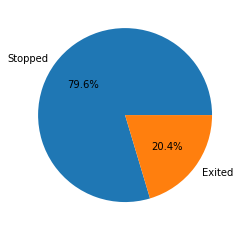

In [ ]:
df1 = df['Exited'].value_counts().values
ax1 = plt.subplot()
ax1.pie(df1, labels =["Stopped", "Exited"], autopct ='%1.1f%%')

##### Overview through categorical variables:
    - Geography
    - Gender
    - HasCrCard
    - IsActiveMember

<font color='red'>**Exercise 6:**</font> Using barchart to compare churn rate by Geography.

In [ ]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df1 = df.pivot_table(index="Geography",columns="Exited",values="Age",aggfunc="count")
df1 = df1.reset_index()
df1.columns = ['Geography', 'NoneExited' , 'Exited']
df1['rate'] = df1['Exited']/(df1['NoneExited']+df1['Exited'])

In [ ]:
df1.head()

,Geography,NoneExited,Exited,rate
0,France,4204,810,0.161548
1,Germany,1695,814,0.324432
2,Spain,2064,413,0.166734


In [ ]:
df_churn = df.reset_index().groupby(['Exited', 'Geography'])['index'].count().unstack(0)
df_churn

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

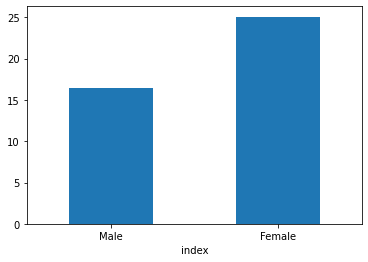

In [ ]:
df1 = pd.merge(
    df['Gender'].value_counts().reset_index().rename(columns={'Gender': 'Total'}),
    df[df['Exited']==1]['Gender'].value_counts().reset_index().rename(columns={'Gender': 'TotalChurn'}),
    on='index'
)

df1['ChurnRate'] = df1['TotalChurn']*100/df1['Total']
df1.set_index('index')['ChurnRate'].plot(kind='bar')
plt.xticks(rotation=0)

In [ ]:
df1

,index,Total,TotalChurn,ChurnRate
0,Male,5457,898,16.455928
1,Female,4543,1139,25.071539


In [ ]:
25.071539-16.455928

8.615611000000001

<font color='red'>**Exercise 7:**</font> How different churn rate between Male & Female?

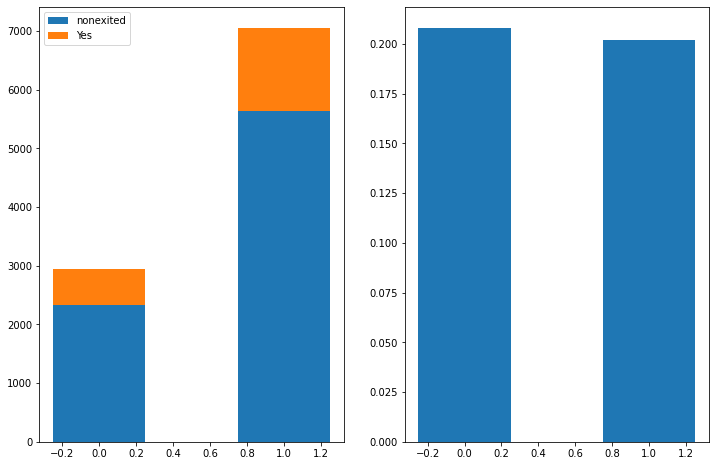

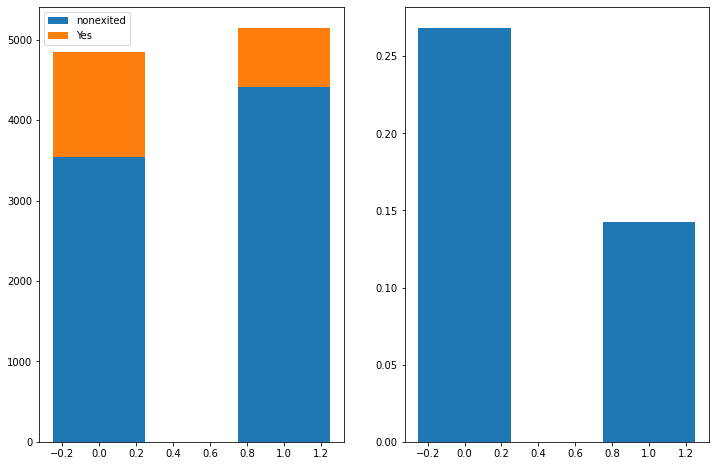

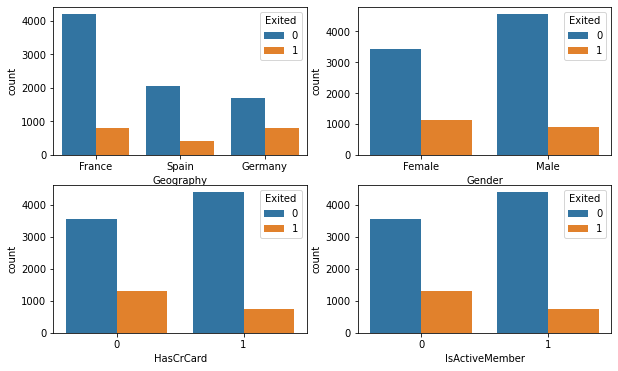

##### Overview through nummerical variables
    - CreditScore
    - Age
    - Tenure
    - Balance
    - NumOfProducts
    - EstimatedSalary

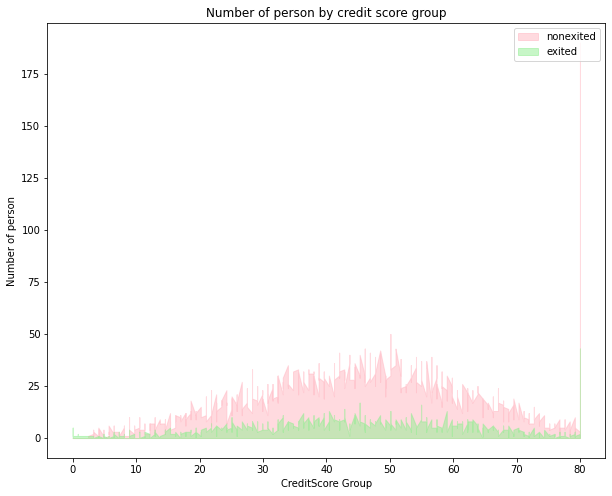

In [ ]:
# Number of customer by Existed by creditScore
score_exited = df.pivot_table(index="CreditScore",columns="Exited",
                                     values="Age",
                                     aggfunc=["count"])

score_exited.columns = ["nonexited","exited"]
score_exited = score_exited.reset_index()
score_exited = score_exited.fillna(0)

score_exited.describe(include="all")

score_exited['CreditScore2'] = pd.qcut(score_exited.CreditScore, 100, 
          labels=np.linspace(0, 80, num=100))

plt.figure(figsize=(10,8))

plt.fill_between(score_exited['CreditScore2'], 
                 score_exited['nonexited'], 
                 color="lightpink",
                 alpha=0.5, label='nonexited')

plt.fill_between(score_exited['CreditScore2'], 
                 score_exited['exited'], 
                 color="lightgreen",
                 alpha=0.5, label='exited')
plt.title('Number of person by credit score group')
plt.ylabel('Number of person')
plt.xlabel('CreditScore Group')
plt.legend()
plt.show()

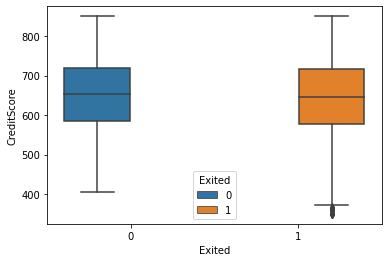

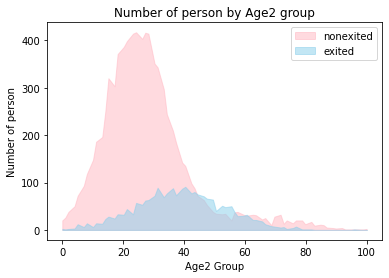

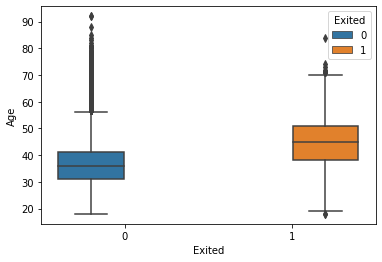

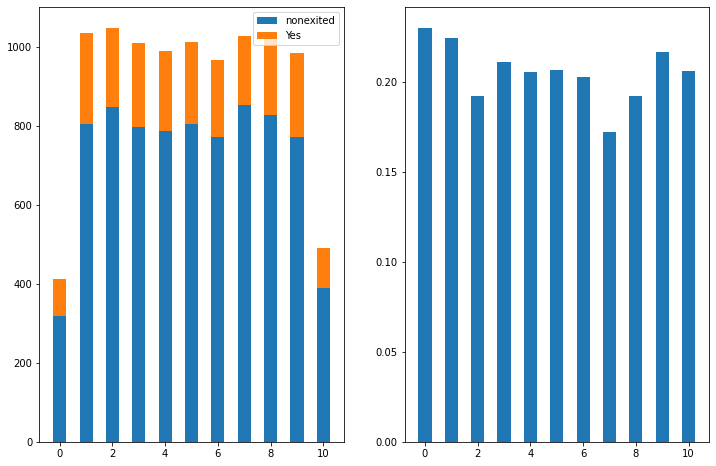

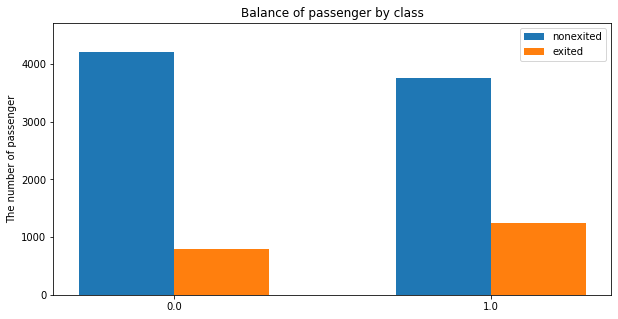

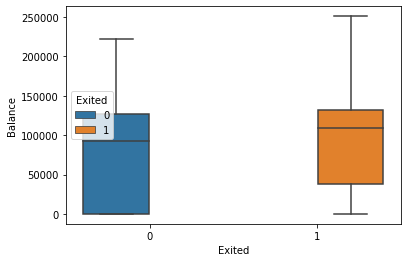

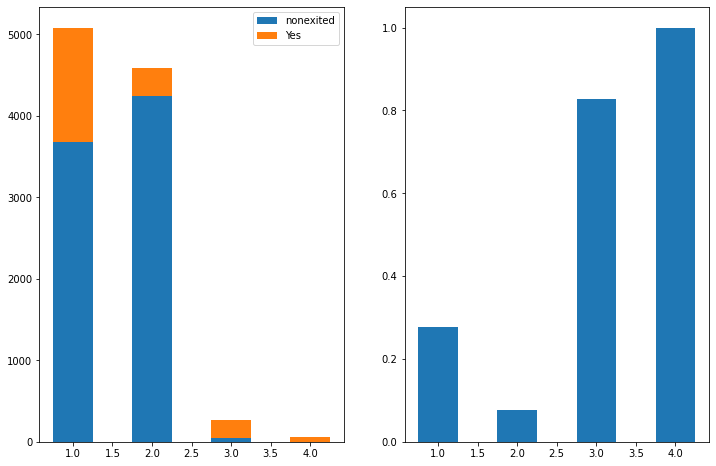

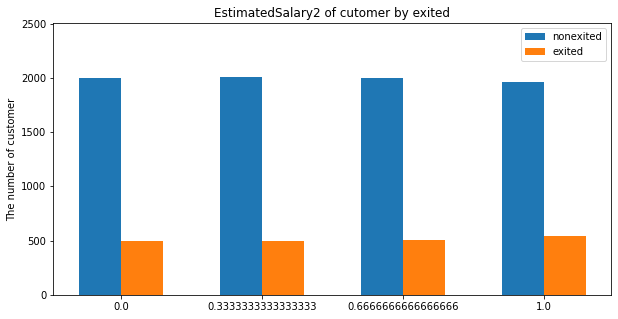

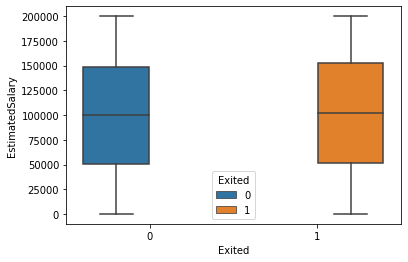

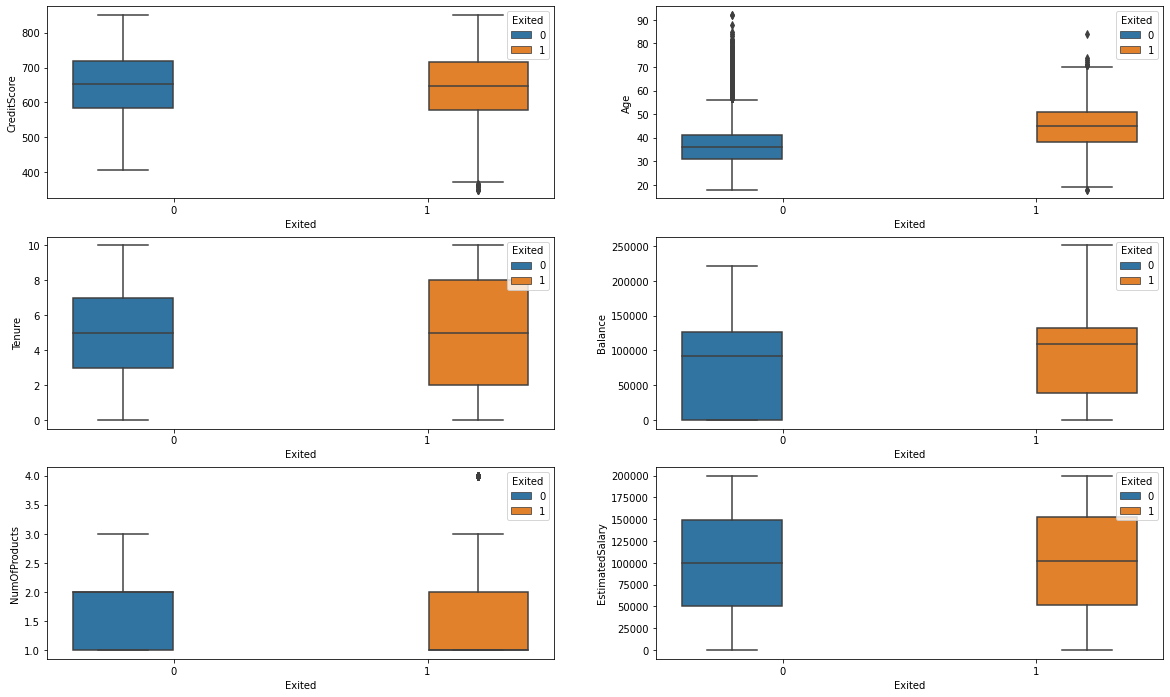

In [ ]:
# Review nhanh qua các biến số theo Exited column (seaborn)


#### Model prediction
    - Data reproccessing
    - Doing some transfrom data before fit to model
    - Split train & test data
    - Train model with train data set
    - Test performance of model which trained above

###### LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

df_train = pd.read_csv(path2data + '/final-Churn-Modelling.csv', delimiter=',')
df_train.shape
df_train = df_train.drop(["RowNumber", "Surname", "CustomerId"], axis = 1)
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df_test = pd.read_csv(path2data + '/final-Churn-Modelling-Test-Data.csv', delimiter=',')
df_test.shape
df_test = df_test.drop(["RowNumber", "Surname", "CustomerId"], axis = 1)
df_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,565,France,Male,31,1,0.00,1,0,1,20443.08,0
1,569,France,Male,34,4,0.00,1,0,1,4045.90,0
2,669,France,Female,20,7,0.00,2,1,0,128838.67,0
3,694,France,Male,39,4,173255.48,1,1,1,81293.10,0
4,504,Spain,Male,28,10,109291.36,1,1,1,187593.15,0


## Feature engineering:

In [ ]:
print(len(df_train))
print(len(df_test))

10000
1000


(-1.0, 5.0)

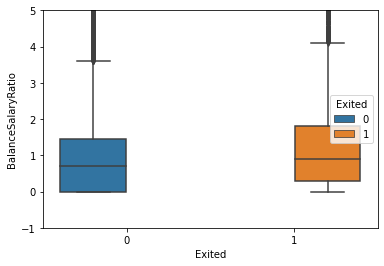

In [ ]:
# Create ratio between Balance & Salary
df_train['BalanceSalaryRatio'] = df_train.Balance/df_train.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 5)

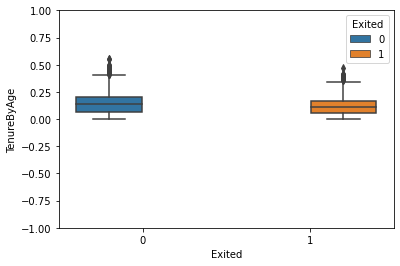

In [ ]:
df_train['TenureByAge'] = df_train.Tenure/(df_train.Age)#so nam dung dich vu
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 1)
plt.show()

In [ ]:
df_train['CreditScoreGivenAge'] = df_train.CreditScore/(df_train.Age)
df_train.head()
# nen số hóa các dữ liệu ko fai số
# Re-arrange the columns
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 
                   'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']

cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']

df_train = df_train[['Exited'] + continuous_vars + cat_vars]
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
0,1,619,42,2,0.00,1,101348.88,0.000000,0.047619,14.738095,1,1,France,Female
1,0,608,41,1,83807.86,1,112542.58,0.744677,0.024390,14.829268,0,1,Spain,Female
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,0,France,Female
3,0,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,0,0,France,Female
4,0,850,43,2,125510.82,1,79084.10,1.587055,0.046512,19.767442,1,1,Spain,Female


In [ ]:
# Convert categorical variable to nummeric (Avoid: 0 x a = 0) 
df_train.loc[df_train.HasCrCard == 0, 'HasCrCard'] = -1
df_train.loc[df_train.IsActiveMember == 0, 'IsActiveMember'] = -1
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
0,1,619,42,2,0.00,1,101348.88,0.000000,0.047619,14.738095,1,1,France,Female
1,0,608,41,1,83807.86,1,112542.58,0.744677,0.024390,14.829268,-1,1,Spain,Female
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,-1,France,Female
3,0,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,-1,-1,France,Female
4,0,850,43,2,125510.82,1,79084.10,1.587055,0.046512,19.767442,1,1,Spain,Female


In [ ]:
# One hot encode the categorical variables
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (df_train[i].dtype == np.str or df_train[i].dtype == np.object):
        for j in df_train[i].unique():
            df_train[i+'_'+j] = np.where(df_train[i] == j,1,-1)
        remove.append(i)
df_train = df_train.drop(remove, axis=1)
df_train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,1,619,42,2,0.00,1,101348.88,0.000000,0.047619,14.738095,1,1,1,-1,-1,1,-1
1,0,608,41,1,83807.86,1,112542.58,0.744677,0.024390,14.829268,-1,1,-1,1,-1,1,-1
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,-1,1,-1,-1,1,-1
3,0,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,-1,-1,1,-1,-1,1,-1
4,0,850,43,2,125510.82,1,79084.10,1.587055,0.046512,19.767442,1,1,-1,1,-1,1,-1


In [ ]:
# minMax scaling the continuous variables
minVec = df_train[continuous_vars].min().copy()
maxVec = df_train[continuous_vars].max().copy()

df_train[continuous_vars] = (df_train[continuous_vars]-minVec)/(maxVec-minVec)
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,1,0.538,0.324324,0.2,0.000000,0.000000,0.506735,0.000000,0.085714,0.235083,1,1,1,-1,-1,1,-1
1,0,0.516,0.310811,0.1,0.334031,0.000000,0.562709,0.000070,0.043902,0.237252,-1,1,-1,1,-1,1,-1
2,1,0.304,0.324324,0.8,0.636357,0.666667,0.569654,0.000132,0.342857,0.168807,1,-1,1,-1,-1,1,-1
3,0,0.698,0.283784,0.1,0.000000,0.333333,0.469120,0.000000,0.046154,0.310859,-1,-1,1,-1,-1,1,-1
4,0,1.000,0.337838,0.2,0.500246,0.000000,0.395400,0.000150,0.083721,0.354739,1,1,-1,1,-1,1,-1


In [ ]:
# data prep pipeline for test data
def DfPrepPipeline(df_predict,df_train_Cols,minVec,maxVec):
    # Add features mới
    df_predict['BalanceSalaryRatio'] = df_predict.Balance/df_predict.EstimatedSalary
    df_predict['TenureByAge'] = df_predict.Tenure/(df_predict.Age - 18)
    df_predict['CreditScoreGivenAge'] = df_predict.CreditScore/(df_predict.Age - 18)
    # Re-arrange columns
    continuous_vars = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
    cat_vars = ['HasCrCard','IsActiveMember',"Geography", "Gender"] 
    df_predict = df_predict[['Exited'] + continuous_vars + cat_vars]
    
    # convert categorical variables
    df_predict.loc[df_predict.HasCrCard == 0, 'HasCrCard'] = -1
    df_predict.loc[df_predict.IsActiveMember == 0, 'IsActiveMember'] = -1
    
    # One hot
    lst = ["Geography", "Gender"]
    remove = list()
    for i in lst:
        for j in df_predict[i].unique():
            df_predict[i+'_'+j] = np.where(df_predict[i] == j,1,-1)
        remove.append(i)
    df_predict = df_predict.drop(remove, axis=1)
    
    # Set value 0 to -1
    L = list(set(df_train_Cols) - set(df_predict.columns))
    for l in L:
        df_predict[str(l)] = -1        
        
    # Min-Max scale
    df_predict[continuous_vars] = (df_predict[continuous_vars]-minVec)/(maxVec-minVec)
    
    # To guarantee colums on train & test
    df_predict = df_predict[df_train_Cols]
    return df_predict

In [ ]:
# Fit primal logistic regression

# Reference:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Performance on test
df_test = DfPrepPipeline(df_test,df_train.columns,minVec,maxVec)
df_test = df_test.mask(np.isinf(df_test))
df_test = df_test.dropna()
df_test.shape

(999, 17)

In [ ]:
# transform features to degree = 2
from sklearn.preprocessing import PolynomialFeatures
# (a,b) ==> [1,a,b,a^2,ab,b^2]

poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(df_train.loc[:, df_train.columns != 'Exited'])
df_train_pol2.shape

(10000, 153)

In [ ]:
df_train_pol2[:3]

array([[ 1.00000000e+00,  5.38000000e-01,  3.24324324e-01,
         2.00000000e-01,  0.00000000e+00,  0.00000000e+00,
         5.06734893e-01,  0.00000000e+00,  8.57142857e-02,
         2.35083082e-01,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         1.00000000e+00, -1.00000000e+00,  2.89444000e-01,
         1.74486486e-01,  1.07600000e-01,  0.00000000e+00,
         0.00000000e+00,  2.72623373e-01,  0.00000000e+00,
         4.61142857e-02,  1.26474698e-01,  5.38000000e-01,
         5.38000000e-01,  5.38000000e-01, -5.38000000e-01,
        -5.38000000e-01,  5.38000000e-01, -5.38000000e-01,
         1.05186267e-01,  6.48648649e-02,  0.00000000e+00,
         0.00000000e+00,  1.64346452e-01,  0.00000000e+00,
         2.77992278e-02,  7.62431616e-02,  3.24324324e-01,
         3.24324324e-01,  3.24324324e-01, -3.24324324e-01,
        -3.24324324e-01,  3.24324324e-01, -3.24324324e-01,
         4.00000000e-02,  0.00000000e+00,  0.00000000e+0

In [ ]:
# # transform features to degree = 2
# from sklearn.preprocessing import PolynomialFeatures
# # (a,b) ==> [1,a,b,a^2,ab,b^2]

# poly2 = PolynomialFeatures(degree=2)
# df_train_pol2 = poly2.fit_transform(df_train.loc[:, df_train.columns != 'Exited'])

# Reference:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
model2 = LogisticRegression(C=10, class_weight=None, dual=False, 
                              fit_intercept=True,intercept_scaling=1, 
                              max_iter=300, multi_class='auto', n_jobs=None, 
                              penalty='l2', random_state=None, 
                              solver='liblinear',tol=0.0001, 
                              verbose=0, warm_start=False)

model2.fit(df_train_pol2,df_train.Exited)


LogisticRegression(C=10, max_iter=300, solver='liblinear')

In [ ]:

# Performance assess on train
pred_y = model2.predict(df_train_pol2)
pred_y[:10]



array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
temp = df_train.loc[:, df_train.columns != 'Exited']
temp['real'] = df_train.Exited
temp['predict'] = pred_y

temp.pivot_table(index="real",columns="predict",values="Age",aggfunc="count")

TP = len(temp[(temp['real'] == 1) & (temp['predict'] == 1)])
FP = len(temp[(temp['real'] == 0) & (temp['predict'] == 1)])
TN = len(temp[(temp['real'] == 0) & (temp['predict'] == 0)])
FN = len(temp[(temp['real'] == 1) & (temp['predict'] == 0)])

accuracy = (TP+TN)/len(temp)
precision = TP/(TP+FP)
recall = TP/(TP+FN)

print(accuracy,precision,recall)



0.8613 0.7708333333333334 0.4540991654393716


In [ ]:
temp.pivot_table(index="real",columns="predict",values="Age",aggfunc="count")

predict,0,1
real,,
0,7688,275
1,1112,925


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(df_train.Exited, model2.predict(df_train_pol2)))

# On test dataset
poly2 = PolynomialFeatures(degree=2)
df_test_pol2 = poly2.fit_transform(df_test.loc[:, df_test.columns != 'Exited'])
df_test_pol2.shape

# dự báo
pred_y = model2.predict(df_test_pol2)
pred_y[:10]

temp = df_test.loc[:, df_test.columns != 'Exited']
temp['real'] = df_test.Exited
temp['predict'] = pred_y

temp.pivot_table(index="real",columns="predict",values="Age",aggfunc="count")

TP = len(temp[(temp['real'] == 1) & (temp['predict'] == 1)])
FP = len(temp[(temp['real'] == 0) & (temp['predict'] == 1)])
TN = len(temp[(temp['real'] == 0) & (temp['predict'] == 0)])
FN = len(temp[(temp['real'] == 1) & (temp['predict'] == 0)])

accuracy = (TP+TN)/len(temp)
precision = TP/(TP+FP)
recall = TP/(TP+FN)

print(accuracy,precision,recall)

print(classification_report(df_test.Exited, model2.predict(df_test_pol2)))


              precision    recall  f1-score   support

           0       0.87      0.97      0.92      7963
           1       0.77      0.45      0.57      2037

    accuracy                           0.86     10000
   macro avg       0.82      0.71      0.74     10000
weighted avg       0.85      0.86      0.85     10000

0.5185185185185185 0.2979890310786106 0.6269230769230769
              precision    recall  f1-score   support

           0       0.79      0.48      0.60       739
           1       0.30      0.63      0.40       260

    accuracy                           0.52       999
   macro avg       0.54      0.55      0.50       999
weighted avg       0.66      0.52      0.55       999



# Clustering
#### The steps are broadly divided into:

1. [Step 1: Reading and Understanding the Data](#1)
1. [Step 2: Data Cleansing](#2)
1. [Step 3: Data Preparation](#3)
1. [Step 4: Model Building](#4)
1. [Step 5: Final Analysis](#5)

<a id="1"></a> <br>
## Step 1 : Reading and Understanding Data

In [ ]:
# import required libraries for dataframe and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
# Reading the data on which analysis needs to be done
path2data = "/content/drive/My Drive/Colab Notebooks/Session 4 - Machine Learning Introduction"
retail = pd.read_csv(path2data + "/Online Retail.csv", 
                     error_bad_lines=False,
                     sep=";")
retail.head()




FileNotFoundError: ignored

In [ ]:
# shape of df
retail.shape

(541909, 8)

In [ ]:
# df info
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  object 
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [ ]:
# df description
retail.describe()

,Quantity,CustomerID
count,541909.000000,406829.000000
mean,9.552250,15287.690570
std,218.081158,1713.600303
min,-80995.000000,12346.000000
25%,1.000000,13953.000000
50%,3.000000,15152.000000
75%,10.000000,16791.000000
max,80995.000000,18287.000000


<a id="2"></a> <br>
## Step 2 : Data Cleansing

<font color='red'>**Exercise 8:**</font> Calculating the Missing Values % contribution in DF?

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [ ]:
# Droping rows having missing values
retail = retail.dropna()
retail.shape

(406829, 10)

In [ ]:
# Changing the datatype of Customer Id as per Business understanding
retail['CustomerID'] = retail['CustomerID'].astype(str)

<font color='red'>**Exercie 9:**</font> Convert UnitPrice to numeric

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom


<a id="3"></a> <br>
## Step 3 : Data Preparation

#### We are going to analysis the Customers based on below 3 factors:
- R (Recency): Number of days since last purchase
- F (Frequency): Number of tracsactions
- M (Monetary): Total amount of transactions (revenue contributed)

In [ ]:
# New Attribute : Monetary
retail['Amount'] = retail['Quantity']*retail['UnitPrice']
rfm_m = retail.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,"1,041,041,041,041,041,041,041,041,041,041,041,..."
1,12347.0,"2,12,12,12,12,12,12,12,12,12,12,12,14,254,254,..."
2,12348.0,"0,550,550,550,550,550,550,550,550,550,550,550,..."
3,12349.0,"7,57,59,959,952,952,952,952,952,952,954,254,25..."
4,12350.0,"2,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12..."


In [ ]:
# New Attribute : Frequency
rfm_f = retail.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [ ]:
# Merging the two dfs
rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,"1,041,041,041,041,041,041,041,041,041,041,041,...",2
1,12347.0,"2,12,12,12,12,12,12,12,12,12,12,12,14,254,254,...",182
2,12348.0,"0,550,550,550,550,550,550,550,550,550,550,550,...",31
3,12349.0,"7,57,59,959,952,952,952,952,952,952,954,254,25...",73
4,12350.0,"2,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12...",17


In [ ]:
# New Attribute : Recency
# Convert to datetime to proper datatype
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],format='%d/%m/%Y %H:%M')

In [ ]:
# Compute the maximum date to know the last transaction date
max_date = max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [ ]:
# Compute the difference between max date and transaction date
retail['Diff'] = max_date - retail['InvoiceDate']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,"2,55",17850.0,United Kingdom,"2,552,552,552,552,552,55",373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom,"3,393,393,393,393,393,39",373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,"2,75",17850.0,United Kingdom,"2,752,752,752,752,752,752,752,75",373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom,"3,393,393,393,393,393,39",373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom,"3,393,393,393,393,393,39",373 days 04:24:00


In [ ]:
# Compute last transaction date to get the recency of customers
rfm_p = retail.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [ ]:
# Extract number of days only
rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [ ]:
# Merge tha dataframes to get the final RFM dataframe
rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,"1,041,041,041,041,041,041,041,041,041,041,041,...",2,325
1,12347.0,"2,12,12,12,12,12,12,12,12,12,12,12,14,254,254,...",182,1
2,12348.0,"0,550,550,550,550,550,550,550,550,550,550,550,...",31,74
3,12349.0,"7,57,59,959,952,952,952,952,952,952,954,254,25...",73,18
4,12350.0,"2,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12...",17,309


#### There are 2 types of outliers and we will treat outliers as it can skew our dataset
- Statistical
- Domain specific

Text(0.5, 0, 'Attributes')

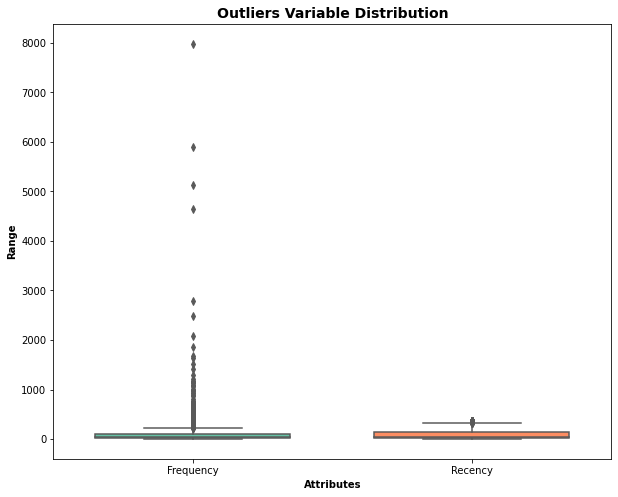

In [ ]:
# Outlier Analysis of Amount Frequency and Recency
attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [ ]:
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,"1,041,041,041,041,041,041,041,041,041,041,041,...",2,325
1,12347.0,"2,12,12,12,12,12,12,12,12,12,12,12,14,254,254,...",182,1
2,12348.0,"0,550,550,550,550,550,550,550,550,550,550,550,...",31,74
3,12349.0,"7,57,59,959,952,952,952,952,952,952,954,254,25...",73,18
4,12350.0,"2,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12...",17,309


In [ ]:
rfm.columns

Index(['CustomerID', 'Amount', 'Frequency', 'Recency'], dtype='object')

In [ ]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

TypeError: ignored

In [ ]:
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,"1,041,041,041,041,041,041,041,041,041,041,041,...",2,325
1,12347.0,"2,12,12,12,12,12,12,12,12,12,12,12,14,254,254,...",182,1
2,12348.0,"0,550,550,550,550,550,550,550,550,550,550,550,...",31,74
3,12349.0,"7,57,59,959,952,952,952,952,952,952,954,254,25...",73,18
4,12350.0,"2,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12...",17,309


### Rescaling the Attributes

It is extremely important to rescale the variables so that they have a comparable scale.|
There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

Here, we will use Standardisation Scaling.

In [ ]:
# Rescaling the attributes
rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4293, 3)

In [ ]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


<a id="4"></a> <br>
## Step 4 : Building the Model

### K-Means Clustering

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.<br>

The algorithm works as follows:

- First we initialize k points, called means, randomly.
- We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far.
- We repeat the process for a given number of iterations and at the end, we have our clusters.

In [ ]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4)
kmeans.fit(rfm_df_scaled)

NameError: ignored

In [ ]:
kmeans.labels_

array([2, 3, 0, ..., 2, 0, 0], dtype=int32)

### Finding the Optimal Number of Clusters

#### Elbow Curve to get the right number of Clusters
A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

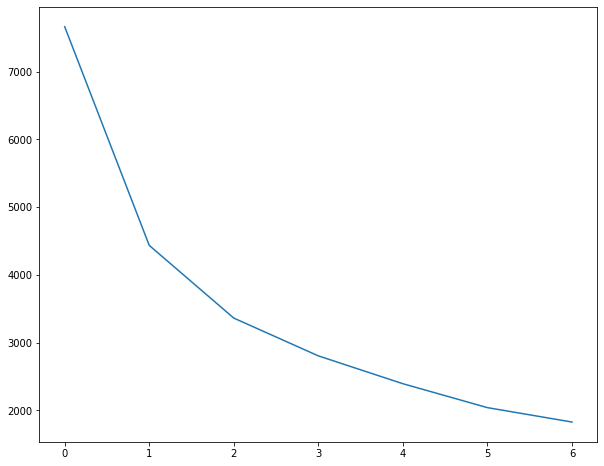

In [ ]:
# Elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [ ]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
 kmeans.labels_

array([0, 2, 1, ..., 0, 1, 1], dtype=int32)

In [ ]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,325,0
1,12347.0,4310.00,182,1,2
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,0


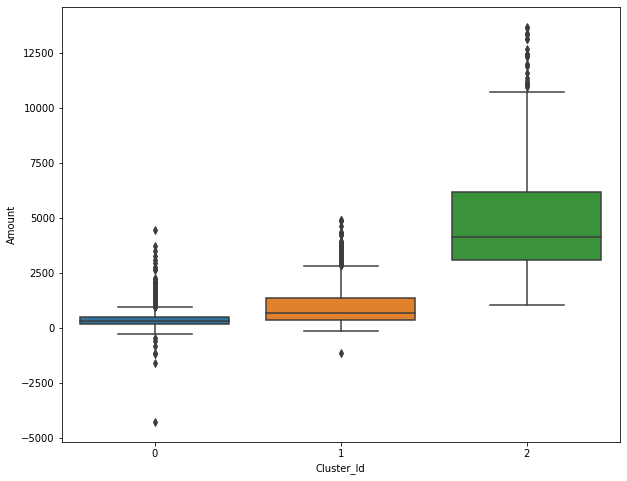

In [ ]:
# Box plot to visualize Cluster Id vs Frequency
sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)

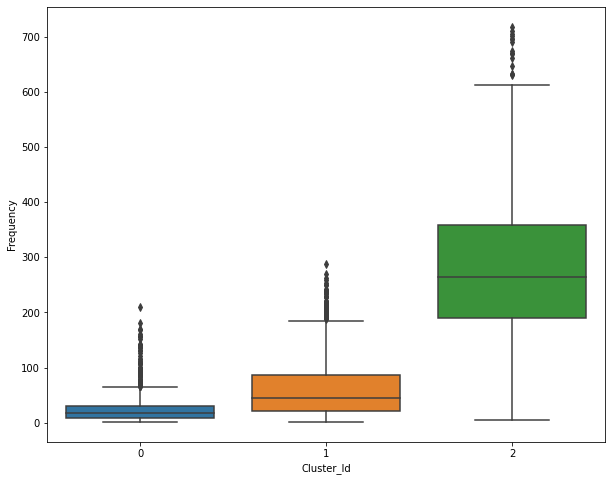

In [ ]:
# Box plot to visualize Cluster Id vs Frequency
sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

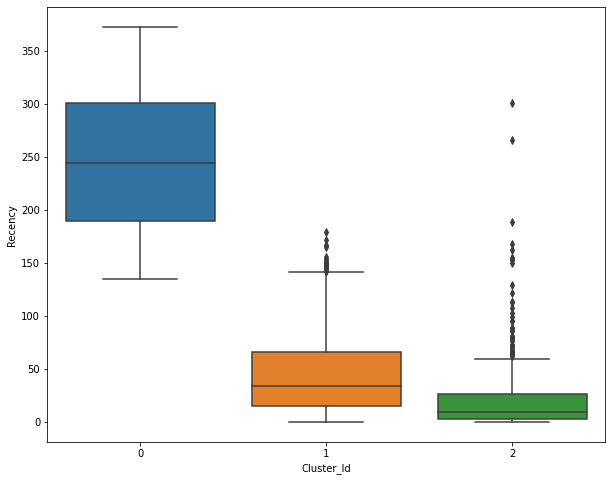

In [ ]:
# Box plot to visualize Cluster Id vs Recency
sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

<a id="5"></a> <br>
## Step 5 : Final Analysis

### Inference:
K-Means Clustering with 3 Cluster Ids
- Customers with Cluster Id 1 are the customers with high amount of transactions as compared to other customers.
- Customers with Cluster Id 1 are frequent buyers.
- Customers with Cluster Id 2 are not recent buyers and hence least of importance from business point of view.

<font color='red'>**Exercise**</font> analyze cus_segment.csv

In [ ]:
cust_df = pd.read_csv(path2data + "/Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
